In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
CRS = 'EPSG:2263'

In [3]:
cbg_gdf = gpd.read_file('./data/nyc_cbgs.geojson')
cbg_gdf = cbg_gdf.rename(columns={
    'CensusBlockGroup': 'cbg',
})
cbg_gdf['cbg'] = cbg_gdf['cbg'].astype(int)
cbg_gdf = cbg_gdf[['cbg', 'geometry']]
cbg_gdf.head()

,cbg,geometry
0,360050175002,"MULTIPOLYGON (((-73.91570 40.83054, -73.91485 ..."
1,360050141001,"MULTIPOLYGON (((-73.91661 40.82499, -73.91592 ..."
2,360050145001,"MULTIPOLYGON (((-73.90584 40.83106, -73.90505 ..."
3,360050075002,"MULTIPOLYGON (((-73.91035 40.81995, -73.91022 ..."
4,360050418001,"MULTIPOLYGON (((-73.86288 40.89515, -73.86146 ..."


In [4]:
cbg_df = pd.read_csv('./data/cbg_attr_and_cluster_1021.csv')
cbg_df = cbg_df.rename(columns={
    'census_block_group': 'cbg',
    'Cluster': 'cluster',
    'Total Population': 'population',
})
cbg_df = cbg_df[['cbg', 'cluster', 'population']]
cbg_df['cluster'] = cbg_df['cluster'].astype('category')
cbg_df.head()

,cbg,cluster,population
0,360050001001,2,6864
1,360050002001,2,1744
2,360050002002,2,1569
3,360050002003,3,1219
4,360050004001,3,598


In [5]:
cbg_gdf = cbg_gdf.merge(cbg_df, how='inner', on=['cbg'])
cbg_gdf.head()

,cbg,geometry,cluster,population
0,360050175002,"MULTIPOLYGON (((-73.91570 40.83054, -73.91485 ...",2,656
1,360050141001,"MULTIPOLYGON (((-73.91661 40.82499, -73.91592 ...",2,1228
2,360050145001,"MULTIPOLYGON (((-73.90584 40.83106, -73.90505 ...",2,2716
3,360050075002,"MULTIPOLYGON (((-73.91035 40.81995, -73.91022 ...",2,3488
4,360050418001,"MULTIPOLYGON (((-73.86288 40.89515, -73.86146 ...",0,657


In [18]:
cbg_gdf['color'] = 'C' + cbg_gdf['cluster'].astype(str)
cbg_gdf.head()

,cbg,geometry,cluster,population,color
0,360050175002,"MULTIPOLYGON (((-73.91570 40.83054, -73.91485 ...",2,656,C2
1,360050141001,"MULTIPOLYGON (((-73.91661 40.82499, -73.91592 ...",2,1228,C2
2,360050145001,"MULTIPOLYGON (((-73.90584 40.83106, -73.90505 ...",2,2716,C2
3,360050075002,"MULTIPOLYGON (((-73.91035 40.81995, -73.91022 ...",2,3488,C2
4,360050418001,"MULTIPOLYGON (((-73.86288 40.89515, -73.86146 ...",0,657,C0


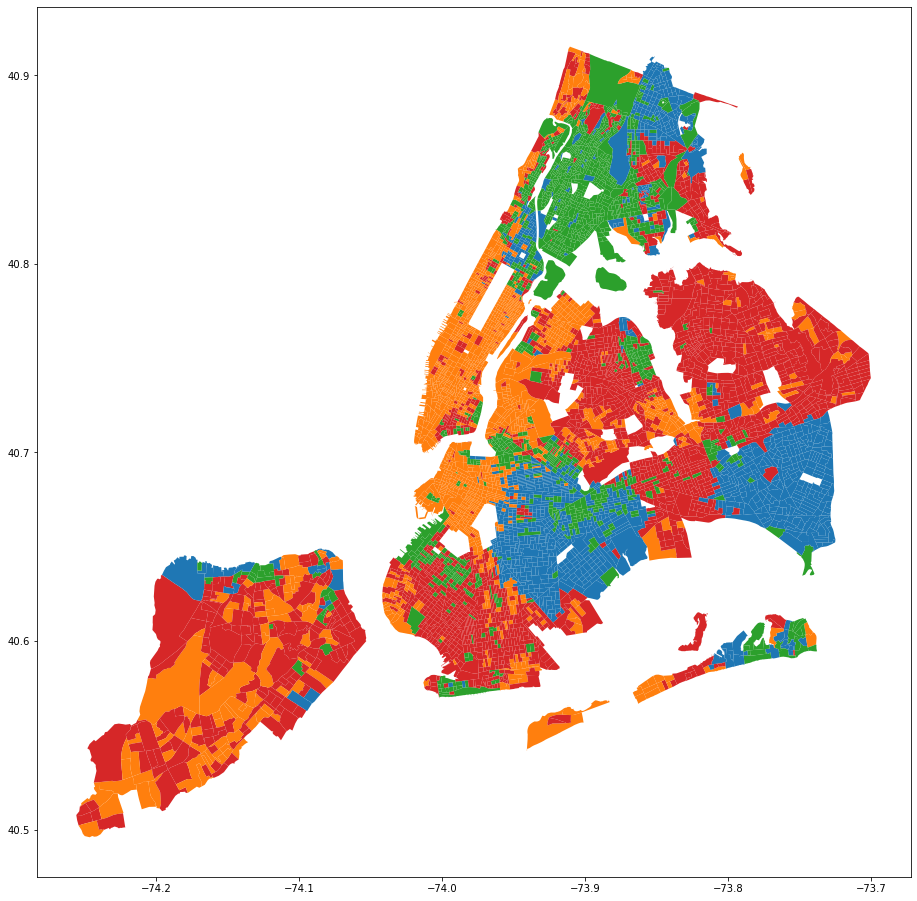

In [22]:
fig, ax = plt.subplots(figsize=(16, 16))
cbg_gdf.plot(column='cluster', ax=ax, color=cbg_gdf['color'])
plt.show()

In [ ]:
# Cluster 0 = Blue
# Cluster 1 = Orange
# Cluster 2 = Green
# Cluster 3 = Red